# IBM Project Name: Real-Time Communication System Powered by AI for Specially Abled 
# TEAM ID: PNT2022TMID29257 
# TEAM Member:Akshaya, Sushmitha, Priya dharshini, Abirami

In [1]:
#import imagedatagenerator
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#training datagen
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [3]:
#testing datagen
test_datagen=ImageDataGenerator(rescale=1./255)

IMPORTING tensorflow

In [4]:
import tensorflow as tf
import os

**Initialize The Model**

In [5]:
#create model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import numpy as np
import matplotlib.pyplot as plt #to view graph in colab itself
import IPython.display as display
from PIL import Image
import pathlib

Unzipping the dataset

In [ ]:
!unzip '/content/Dataset.zip'

unzip:  cannot find or open /content/Dataset.zip, /content/Dataset.zip.zip or /content/Dataset.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Applying ImageDataGenerator to training set

In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/training_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 15750 images belonging to 9 classes.


Applying ImageDataGenerator to test set

In [ ]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/test_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [ ]:
a=len(x_train)
b=len(x_test)

Length of training set

In [ ]:
print(a)

79


Length of test set

In [ ]:
print(b)

12


**Add Layers**

In [ ]:
#create model
model=Sequential()

Add The Convolution Layer

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))

Add Pooling Layer

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

Add The Flatten Layer

In [ ]:
model.add(Flatten())

Adding The Dense Layers

In [ ]:
#output layer
model.add(Dense(units=9,activation='softmax'))

Fit The Model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
79/79 [==============================] - 3328s 42s/step - loss: 0.5067 - accuracy: 0.8357 - val_loss: 0.2001 - val_accuracy: 0.9520
Epoch 2/10
79/79 [==============================] - 103s 1s/step - loss: 0.0488 - accuracy: 0.9862 - val_loss: 0.1503 - val_accuracy: 0.9742
Epoch 3/10
79/79 [==============================] - 100s 1s/step - loss: 0.0178 - accuracy: 0.9961 - val_loss: 0.1845 - val_accuracy: 0.9662
Epoch 4/10
79/79 [==============================] - 102s 1s/step - loss: 0.0150 - accuracy: 0.9956 - val_loss: 0.1446 - val_accuracy: 0.9764
Epoch 5/10
79/79 [==============================] - 103s 1s/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.1998 - val_accuracy: 0.9778
Epoch 6/10
79/79 [==============================] - 104s 1s/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.1860 - val_accuracy: 0.9773
Epoch 7/10
79/79 [==============================] - 102s 1s/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.2164 - val_accuracy: 0.9716
Epoch 8/10


Save The Model

In [ ]:
model.save('priya dharshini.h5')

Import The Packages And Load The Saved Model

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

In [ ]:
#load the model
model=load_model('/content/priya dharshini.h5')

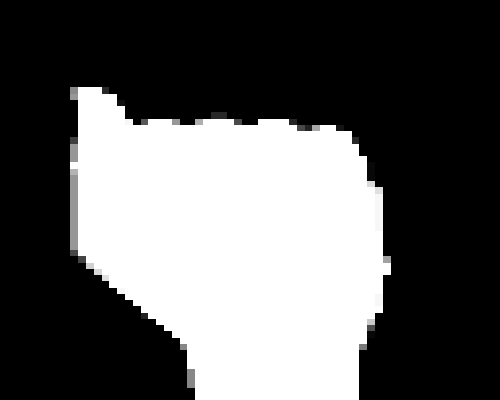

In [ ]:
img=image.load_img('/content/Dataset/test_set/A/10.png',target_size=(400,500))
img